In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [4]:
# read the data data = pd.read_csv('data.csv')

In [5]:
df = pd.read_csv('data.csv',encoding="ISO-8859-1")

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


<AxesSubplot: >

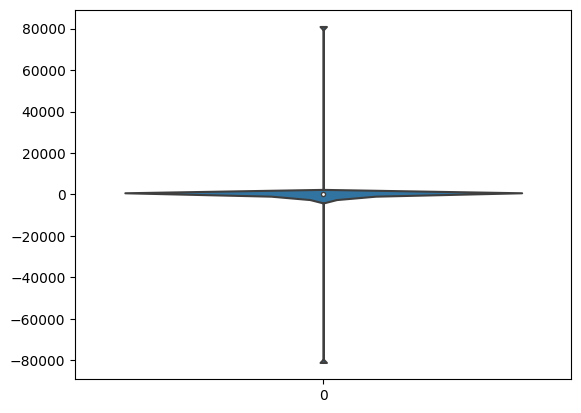

In [8]:
sns.violinplot(df.Quantity)

In [9]:
df.Quantity.describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

<AxesSubplot: >

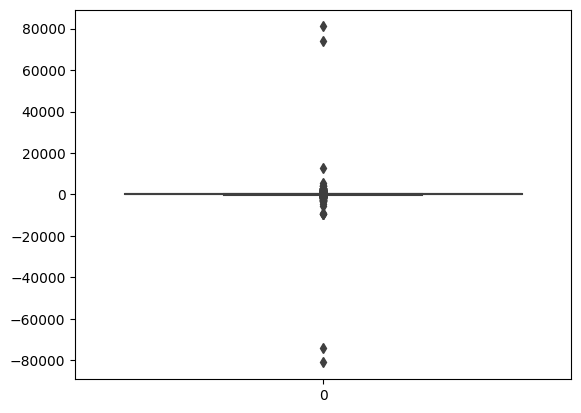

In [10]:
#check the outliers in the data sns.boxplot(df.Quantity)
sns.boxplot(df.Quantity)

In [11]:
recency_df = df.groupby(['CustomerID'],as_index=False)['InvoiceDate'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,1/18/2011 10:17
1,12347.0,8/2/2011 8:48
2,12348.0,9/25/2011 13:13
3,12349.0,11/21/2011 9:51
4,12350.0,2/2/2011 16:01


In [12]:
import datetime as dt
import pandas as pd

NOW = dt.datetime(2011,12,10)

recency_df['LastPurchaseDate'] = pd.to_datetime(recency_df['LastPurchaseDate'])
recency_df['Recency'] = (NOW - recency_df['LastPurchaseDate']).dt.days
recency_df.head()


,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18 10:17:00,325
1,12347.0,2011-08-02 08:48:00,129
2,12348.0,2011-09-25 13:13:00,75
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,310


In [13]:
# create frequency dataframe
frequency_df = df.groupby(['CustomerID'],as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [14]:
# calculate how much customer spend on every purchase
df['Monetary'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [15]:
# check sumned up value of each customer with respect to their last purchase
monetary_df = df.groupby(['CustomerID'],as_index=False)['Monetary'].sum()
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [16]:
# create frequency dataframe
frequency_df = df.groupby(['CustomerID'],as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [17]:
# merge all the dataframes
rfm_df = pd.merge(recency_df,frequency_df,on='CustomerID')
rfm_df = pd.merge(rfm_df,monetary_df,on='CustomerID')
rfm_df.head()

,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary
0,12346.0,2011-01-18 10:17:00,325,2,0.00
1,12347.0,2011-08-02 08:48:00,129,182,4310.00
2,12348.0,2011-09-25 13:13:00,75,31,1797.24
3,12349.0,2011-11-21 09:51:00,18,73,1757.55
4,12350.0,2011-02-02 16:01:00,310,17,334.40


C:\Users\GADA\AppData\Local\Temp\ipykernel_11384\4009070082.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_df.Recency)


<AxesSubplot: xlabel='Recency', ylabel='Density'>

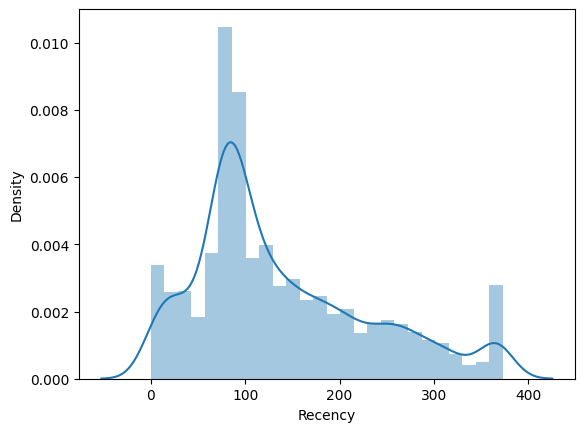

In [18]:
# checking the distribution of the data
sns.distplot(rfm_df.Recency)


In [19]:
# bring all quantile values in a single dataframe
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles


C:\Users\GADA\AppData\Local\Temp\ipykernel_11384\2168748205.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])


{'CustomerID': {0.25: 13812.75, 0.5: 15300.5, 0.75: 16778.25},
 'Recency': {0.25: 75.0, 0.5: 107.0, 0.75: 194.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 102.0},
 'Monetary': {0.25: 293.3625, 0.5: 648.075, 0.75: 1611.725}}

In [20]:
# create a function to calculate the R, F and M values
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    

In [21]:
# get the right number for KMeans clustering
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    

SyntaxError: incomplete input (3308559773.py, line 5)

In [ ]:
rfm_segmentation = 'RFM Kaggle Dataset.ipynb'()

<>:1: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<>:1: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
C:\Users\GADA\AppData\Local\Temp\ipykernel_18004\873601105.py:1: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  rfm_segmentation = 'RFM Kaggle Dataset.ipynb'()


TypeError: 'str' object is not callable

In [ ]:
from sklearn.cluster import KMeans
# get right number of cluster for K-means so we neeed to loop from 1 to 20 number of cluster and check score.
#Elbow method is used to represnt that. 
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(rfm_segmentation).score(rfm_segmentation) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

NameError: name 'rfm_segmentation' is not defined

In [22]:
# define data to rfm_segmentation   
rfm_segmentation = rfm_df[['Recency','Frequency','Monetary']]
rfm_segmentation.head()


,Recency,Frequency,Monetary
0,325,2,0.00
1,129,182,4310.00
2,75,31,1797.24
3,18,73,1757.55
4,310,17,334.40


c:\Users\GADA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\GADA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\GADA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\GADA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

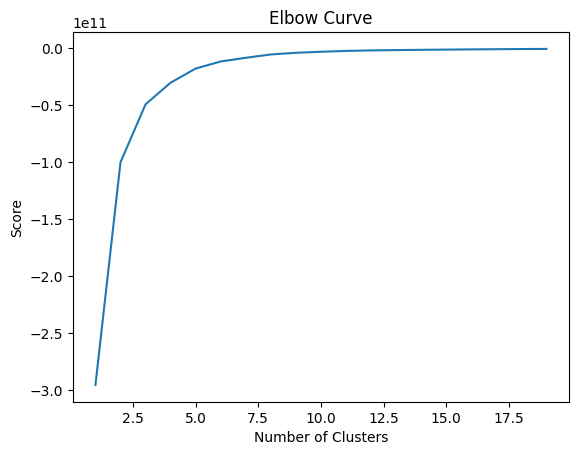

In [23]:
from sklearn.cluster import KMeans
# get right number of cluster for K-means so we neeed to loop from 1 to 20 number of cluster and check score.
#Elbow method is used to represnt that.
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(rfm_segmentation).score(rfm_segmentation) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


In [ ]:
# rfm_segmentation coloumns
rfm_segmentation.columns

Index(['CustomerID', 'LastPurchaseDate', 'Recency', 'Frequency', 'Monetary'], dtype='object')

In [ ]:
# create pivot table that shows the R, F and M values for each customer
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(RScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(RScore, args=('Monetary',quantiles,))
rfm_segmentation.head()


,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
0,12346.0,2011-01-18 10:17:00,325,2,0.00,4,1,1
1,12347.0,2011-08-02 08:48:00,129,182,4310.00,3,4,4
2,12348.0,2011-09-25 13:13:00,75,31,1797.24,1,2,4
3,12349.0,2011-11-21 09:51:00,18,73,1757.55,1,3,4
4,12350.0,2011-02-02 16:01:00,310,17,334.40,4,1,2


In [27]:
# fitting data into kmeans model
kmeans = KMeans(n_clusters=4, random_state=0).fit(rfm_segmentation)
kmeans.labels_


c:\Users\GADA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])